<a href="https://colab.research.google.com/github/PauloHPaulino/TransferLearningDio/blob/main/TranferLearning_cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto de Transfer Learning em Python

## Treinamento de Redes Neurais com Transfer Learning

IMPORTANDO AS BIBLIOTECAS

In [63]:
import tensorflow as tf

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator


In [65]:
from PIL import Image
from io import BytesIO
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import layers

In [66]:
import requests

In [67]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import optimizers

In [68]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  # do not include the top, fully-connected Dense layers 
                  include_top=False,
                  input_shape=(150, 150, 3))

In [69]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

BAIXANDO E EXTRAINDO O DATASET


In [28]:
IMAGE_SIZE = [220, 220]

In [70]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 4s 0us/step


In [71]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [72]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

PRINT DOS TOTAIS DE IMAGENS DE GATOS E CACHORROS NOS DIRETÓRIOS:

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen) 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

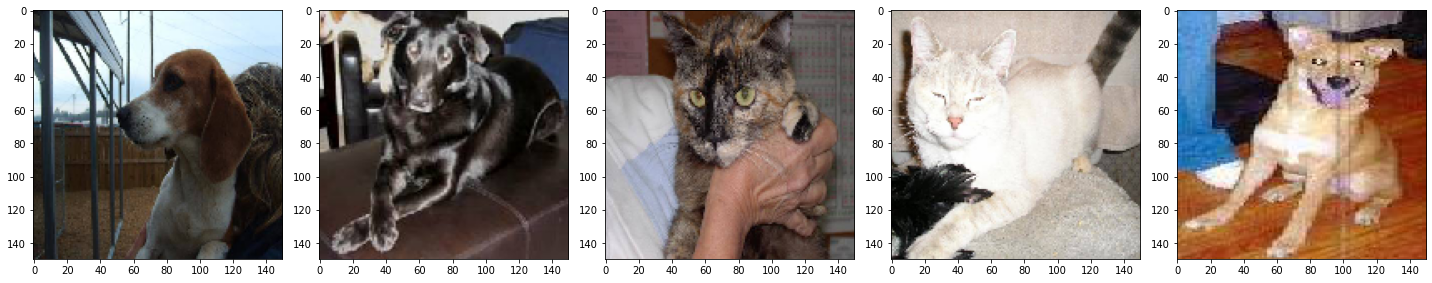

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

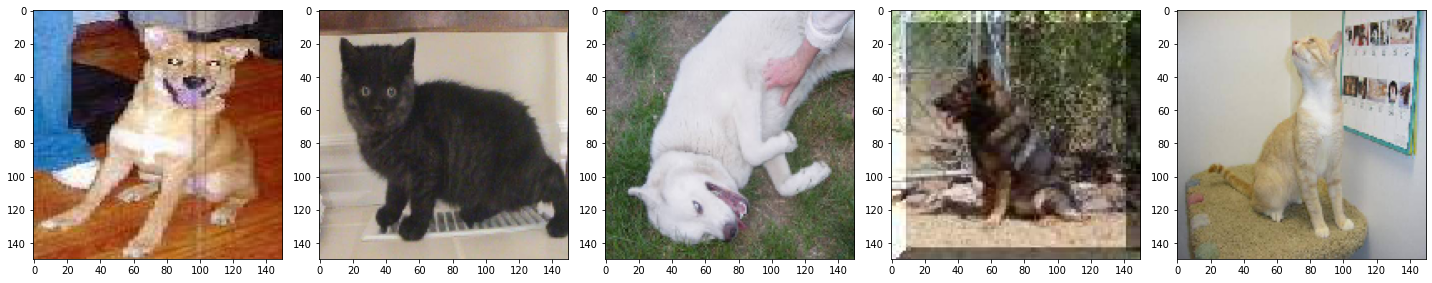

In [ ]:
plotImages(sample_training_images[4:10])  # Plot images 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [59]:
CLASSES = 2
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(CLASSES, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 2)                

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
EPOCHS = 60
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/60
20/20 [==============================] - 18s 425ms/step - loss: 0.7037 - accuracy: 0.5275 - val_loss: 0.6863 - val_accuracy: 0.6090
Epoch 2/60
20/20 [==============================] - 9s 435ms/step - loss: 0.6785 - accuracy: 0.6000 - val_loss: 0.6615 - val_accuracy: 0.6430
Epoch 3/60
20/20 [==============================] - 9s 431ms/step - loss: 0.6397 - accuracy: 0.6415 - val_loss: 0.6418 - val_accuracy: 0.6210
Epoch 4/60
20/20 [==============================] - 9s 430ms/step - loss: 0.5976 - accuracy: 0.6775 - val_loss: 0.6069 - val_accuracy: 0.6590
Epoch 5/60
20/20 [==============================] - 8s 420ms/step - loss: 0.5635 - accuracy: 0.7175 - val_loss: 0.5667 - val_accuracy: 0.7150
Epoch 6/60
20/20 [==============================] - 8s 416ms/step - loss: 0.5118 - accuracy: 0.7490 - val_loss: 0.5656 - val_accuracy: 0.6870
Epoch 7/60
20/20 [==============================] - 8s 424ms/step - loss: 0.4693 - accuracy: 0.7800 - val_loss: 0.5917 - val_accuracy: 0.6920
Epoch

In [43]:
filepath = 'transferlearning_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, node='max')

In [61]:
model.save('cats_and_dogs_filtered.h5')


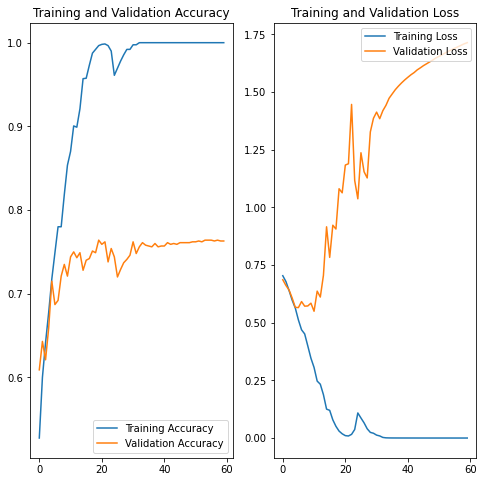

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [47]:
test_images = [
    'https://img.freepik.com/fotos-gratis/lindo-retrato-de-cachorro_23-2149218450.jpg',
    'https://www.petz.com.br/blog/wp-content/uploads/2019/05/cachorro-independente-2.jpg',
    'https://img.freepik.com/fotos-gratis/cachorro-basenji-inteligente-e-amigavel-dando-a-pata-de-perto-isolado-no-branco_346278-1626.jpg',
    'https://img.freepik.com/fotos-gratis/close-vertical-de-um-lindo-gato-europeu-de-pelo-curto_181624-34587.jpg?',
    'https://img.freepik.com/fotos-premium/o-gato-vermelho-levantou-as-duas-patas-da-frente_116815-406.jpg?',
    'https://www.petz.com.br/blog/wp-content/uploads/2022/10/nomes-para-dalmatas.jpg',
    'https://vejasp.abril.com.br/wp-content/uploads/2017/01/06-train-cat-shake-hands.jpg?'
   
]
test_labels = [1, 1, 0, 0, 1, 0, 1, 0]

In [74]:
for (i,l) in enumerate(test_labels):
    response = requests.get(test_images[i])
    img = Image.open(BytesIO(response.content))
    img = np.asanyarray(img)/255
    img = tf.image.resize(img, [IMAGE_SIZE[0], IMAGE_SIZE[1]])
    img = tf.reshape(img, (1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

    prediction = model.predict(img)
    output = np.argmax(prediction)

    label = ['GATO', 'CACHORRO']
    plt.title(f'Predição: {label[output]}\nReal: {label[test_labels[i]]}')
    plt.imshow(img[0, ...])
    plt.show()

ValueError: ignored